## Titanic - Machine Learning from Disaster | Kaggle Comptetion

### Comptetion Description
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**The Challange**  
In this challenge, we are asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).  

To solve this challange I'm going to use Classification using Logistic Regression model.

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 23.0MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.22MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.2MB/s]


In [ ]:
!pip install --upgrade plotly
!pip install -U scikit-learn
!pip uninstall matplotlib -Y
!pip install matplotlib

     |████████████████████████████████| 27.7 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0

Usage:   
  pip3 uninstall [options] <package> ...
  pip3 uninstall [options] -r <requirements file> ...

no such option: -Y


### Imports and Definitions

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import scipy
import plotly.express as px

# sklearn imports
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import pipeline
from sklearn import model_selection
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.feature_selection import RFE
from sklearn.model_selection import LeavePOut
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Data Investigation and Preprocessing
To solve this classification problem we use the Titanic dataset provided by Kaggle.

In [ ]:
# Read and display the data
# data_path = '../input/titanic/train.csv'
# test_path = '../input/titanic/test.csv'
# submission_path = '../input/titanic/gender_submission.csv'

# google colab
data_path = '/content/train.csv'
test_path = '/content/test.csv'
submission_path = '/content/gender_submission.csv'

titanic_df_original = pd.read_csv(data_path)
titanic_test_df = pd.read_csv(test_path)
submission_df = pd.read_csv(submission_path)
display(titanic_df_original)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We can see that the data consist of 12 coloumns.  
Let's display them and figure out their type:

In [ ]:
titanic_df = titanic_df_original.copy()
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Variable, Definition and Key (taken from Kaggle):  
*survival*: Survival -> 0 = No, 1 = Yes  
*pclass*: Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd  
*sex*: Sex  
*Age*: Age in years  
*sibsp*: # of siblings / spouses aboard the Titanic	  
*parch*: # of parents / children aboard the Titanic	  
*ticket*: Ticket number  
*fare*: Passenger fare  
*cabin*: Cabin number  
*embarked*: Port of Embarkation-> C = Cherbourg, Q = Queenstown, S = Southampton  

We learn that most of the data is numreic (either int or float), but there are several features that are objects (which we can assume and see from the data set that they're actully strings).

Before we continute the invistigation let's also check if there are any empty values.

In [ ]:
print("Check if there are columns with empty values")
display(titanic_df.isna().any())

print(f'There are {len(np.where(titanic_df.isnull())[0])} empty values in the dataframe')

# count empty values in each column
def count_empty_values_in_each_column(df: pd.DataFrame):
  print('empty values')
  print('------------\n')
  
  for col in df.columns:
    print(f"{col}: {df[col].isna().sum()}")

count_empty_values_in_each_column(titanic_df)

Check if there are columns with empty values


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

There are 866 empty values in the dataframe
empty values
------------

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


We can see that most of the Cabin feature is empty, and also we miss a lot from the age and cabin feature (but we'll handle it soon).  
First lets drop the Name and PassengerId feature, beacuse we can assume it won't be so helpul for the classification.
Secondly let's have a look on the Ticket feature which is just a reprentation of the ticket number itself, let's drop it as well.


In [ ]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
display(titanic_df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


### Sex
Now becuase the feature of Sex is male or famle and, it's better to transform it into boolean.  
Male = 0  
Feamle  = 1

In [ ]:
titanic_df.replace('male', 0, inplace=True)
titanic_df.replace('female', 1, inplace=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,NaN,S
887,1,1,1,19.0,0,0,30.0000,B42,S
888,0,3,1,NaN,1,2,23.4500,NaN,S
889,1,1,0,26.0,0,0,30.0000,C148,C


### Age
Next, let's handle the missing age values in out data set.  
We have 177 age missing values.  
To solve this we can use different methods - Randomly generate numbers, predict the age using Linear Regression methods or use a constant value.
Beacuse only about 20% of the age is missing we can use a constant the median age.

Let's find it out:  

In [ ]:
print("Age Coulmn Dectiption:")
titanic_df.describe()['Age']

Age Coulmn Dectiption:


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

We see that the median age is 29.699, so lets repalce all the NaN ages with this value.

In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean'))
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.00,1,0,7.2500,NaN,S
1,1,1,1,38.00,1,0,71.2833,C85,C
2,1,3,1,26.00,0,0,7.9250,NaN,S
3,1,1,1,35.00,1,0,53.1000,C123,S
4,0,3,0,35.00,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.00,0,0,13.0000,NaN,S
887,1,1,1,19.00,0,0,30.0000,B42,S
888,0,3,1,21.75,1,2,23.4500,NaN,S
889,1,1,0,26.00,0,0,30.0000,C148,C


### Embarked
Beacuse we have only two Embarked missing from the data, let's check the most embarked place and fill the empty ones.

[Text(0.5, 1.0, 'Most Embarked Port')]

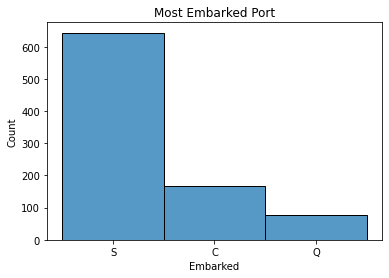

In [ ]:
sns.histplot(data = titanic_df, x= 'Embarked',multiple="stack").set(title='Most Embarked Port')

We can see that port 'S' which is Southampton is the most embarked one, so let's fill the two empty ones with this port.

In [ ]:
titanic_df.Embarked.fillna(titanic_df.Embarked.mode()[0], inplace = True)

### Cabin
Another intersting feature is Cabin, we have 687 missing values of it.  
We might think it's better to drop it, but it might be useful.  
We'll come back to it and the next section.

## Data cleansing and Feature Engenerring
After we added the missing data let's invstigate the data by different graphs, so we can learn what features are releavant and which are not, and also if we can make some transformations.  
Also we can check if we can improve our model by adding new features.  
First we need to look at the heatmap.

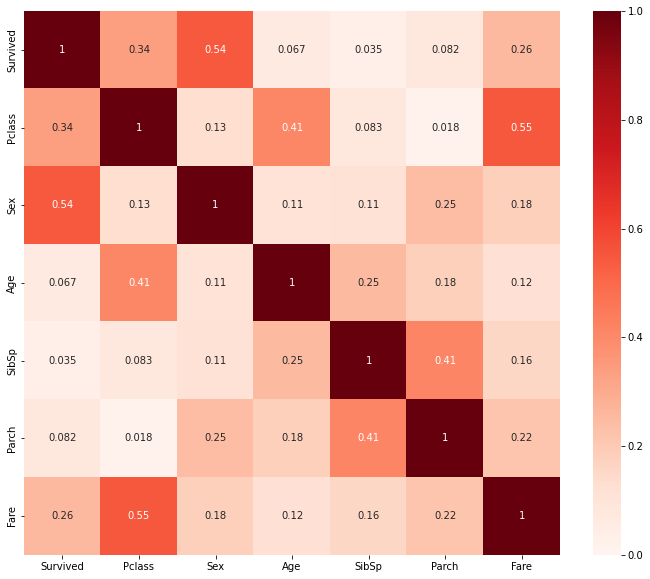

In [ ]:
plt.figure(figsize=(12,10))
cor = np.abs(titanic_df.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

### Back to Embarked

We need to handle the Embarked festure by making it numeric, we can use pandas to convert this featrue into indicators.  

In [ ]:
titanic_df_cp = titanic_df.copy()

titanic_df_cp = pd.get_dummies(titanic_df_cp, columns=["Embarked"])
titanic_df_cp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.00,1,0,7.2500,NaN,0,0,1
1,1,1,1,38.00,1,0,71.2833,C85,1,0,0
2,1,3,1,26.00,0,0,7.9250,NaN,0,0,1
3,1,1,1,35.00,1,0,53.1000,C123,0,0,1
4,0,3,0,35.00,0,0,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.00,0,0,13.0000,NaN,0,0,1
887,1,1,1,19.00,0,0,30.0000,B42,0,0,1
888,0,3,1,21.75,1,2,23.4500,NaN,0,0,1
889,1,1,0,26.00,0,0,30.0000,C148,1,0,0


### What to do with Cabin
We miss a lot of data in the Cabin feature.  
The Cabin feature represnt the Deck and room numbers. 
The titanic had  several decks: most of the top decks were for first class passengers.  
![Titanic Decks](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Olympic_%26_Titanic_cutaway_diagram.png/800px-Olympic_%26_Titanic_cutaway_diagram.png)  
From checking the other version, using and investigating the cabin feature gave me lower results, so I found out it's better to drop it.

In [ ]:
titanic_df_cp['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
titanic_df_cp= titanic_df_cp.drop(['Cabin'], axis=1)

Let's check the correlation again with the new features.

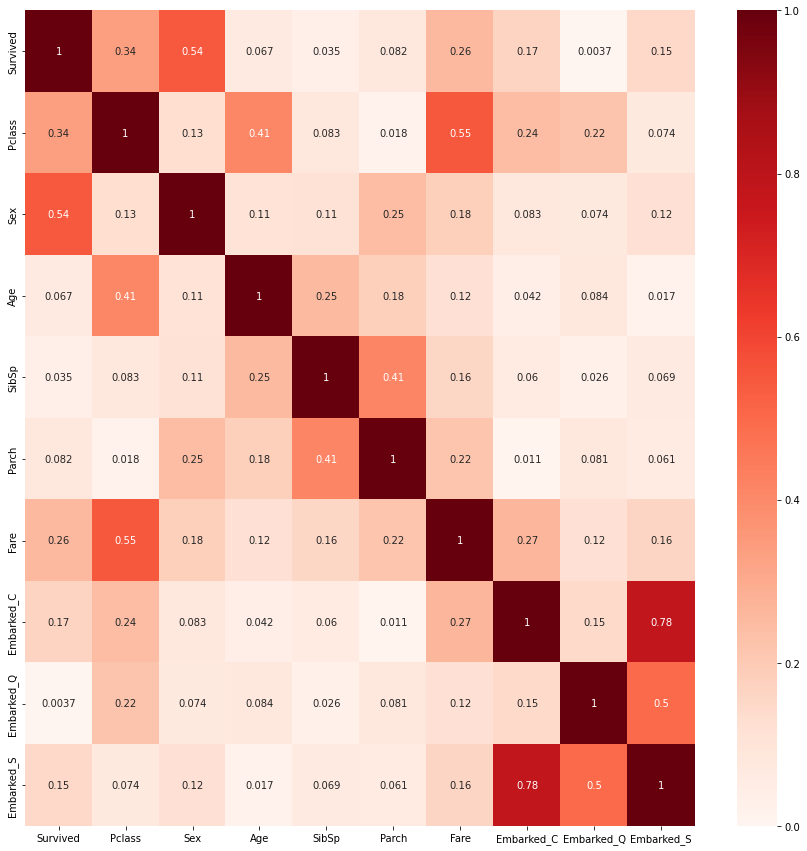

In [ ]:
plt.figure(figsize=(15,15))
cor = np.abs(titanic_df_cp.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

In [ ]:
titanic_df_cp = titanic_df_cp.drop(['Embarked_Q'], axis=1)

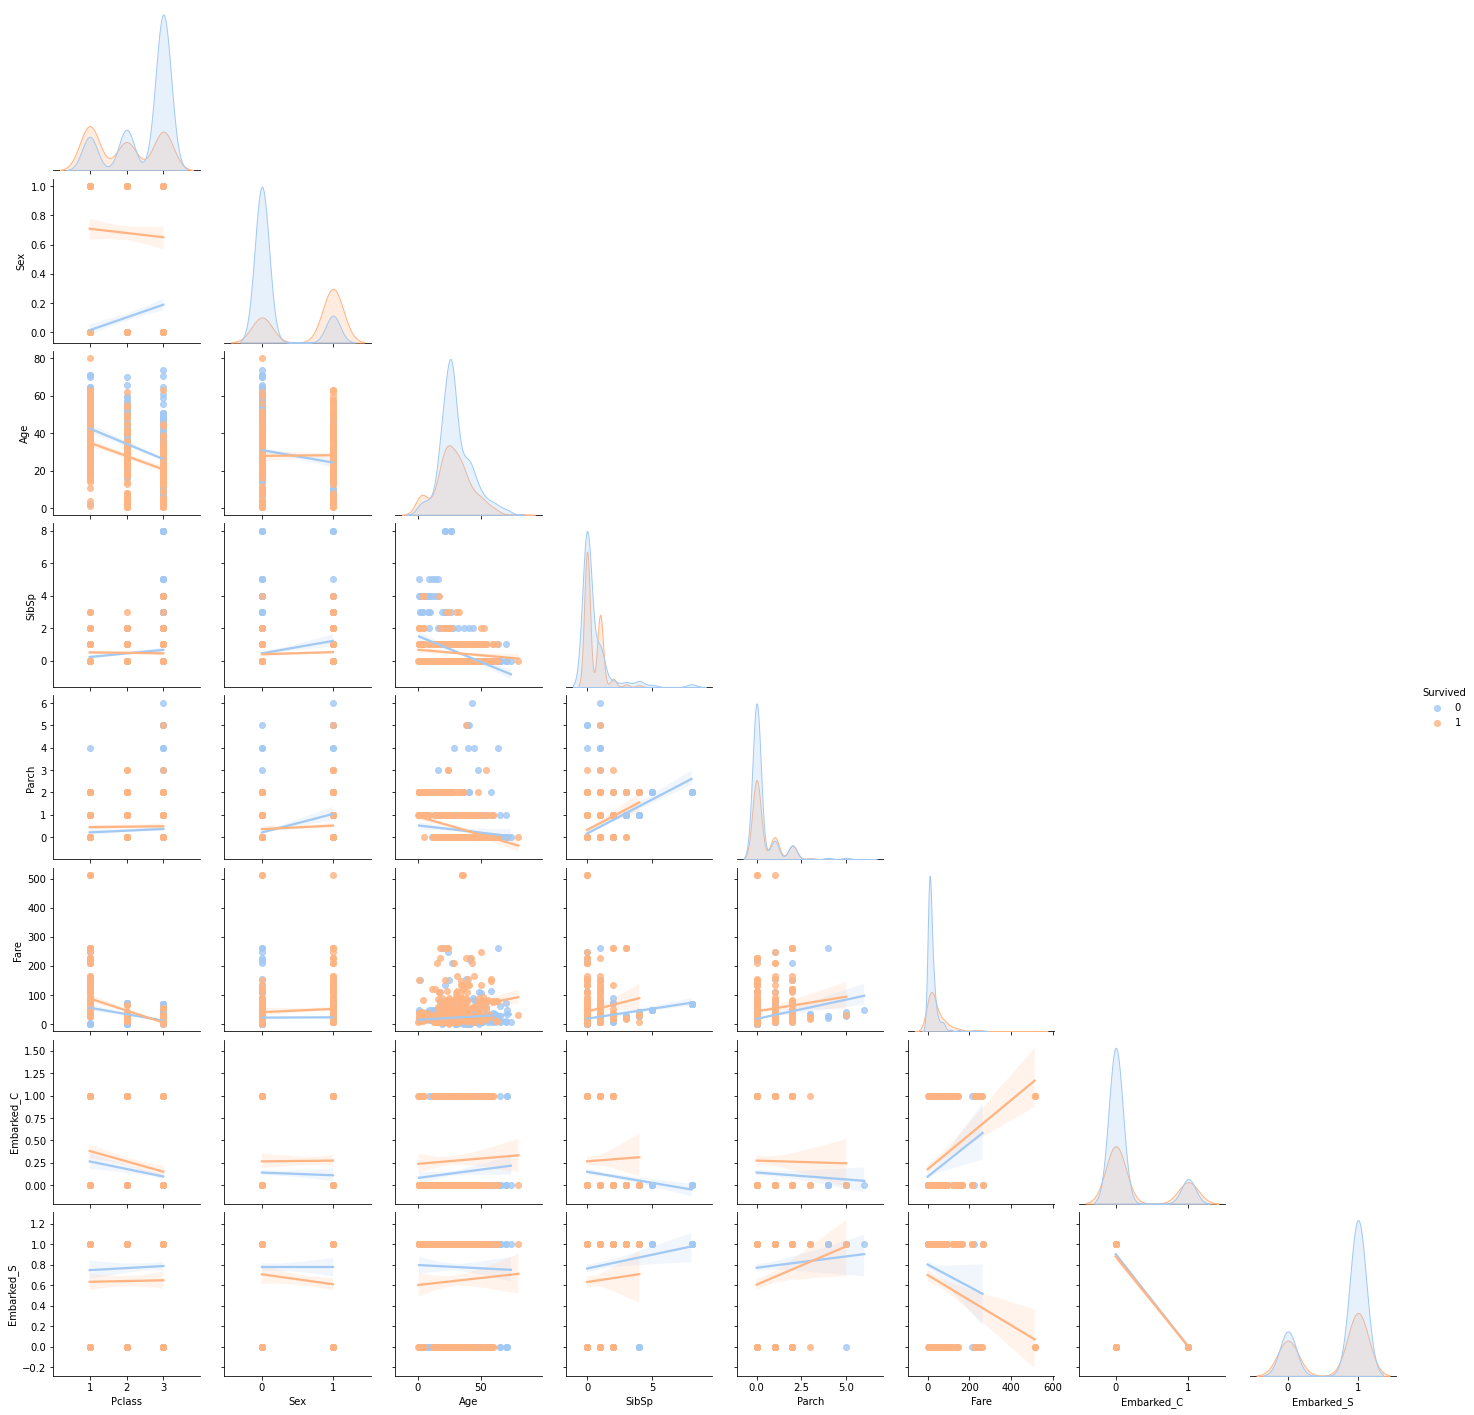

In [ ]:
sns.pairplot(data=titanic_df_cp, hue='Survived', palette='pastel', kind = 'reg', corner= True)

### Sex, Age and Survival rate
The next graphs show the survivel reates by age and sex.

[Text(0.5, 1.0, 'Men Survivel Count')]

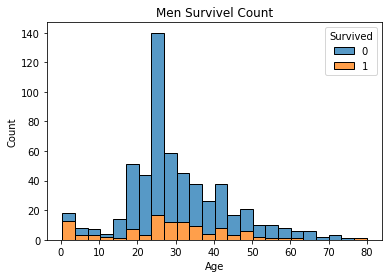

In [ ]:
men_df = titanic_df_cp[titanic_df_cp['Sex']==0]
sns.histplot(data = men_df, x= 'Age', hue = 'Survived',multiple="stack").set(title='Men Survivel Count')

[Text(0.5, 1.0, 'Women Survivel Count')]

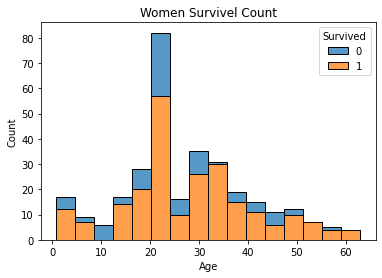

In [ ]:
women_df = titanic_df_cp[titanic_df_cp['Sex']==1]
sns.histplot(data = women_df, x= 'Age', hue = 'Survived',multiple="stack").set(title='Women Survivel Count')

[Text(0.5, 1.0, 'Survivel chance by class')]

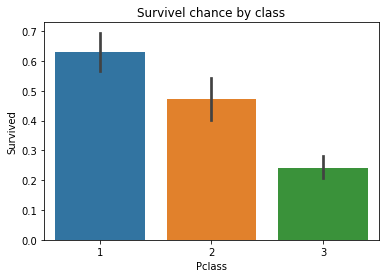

In [ ]:
sns.barplot(data = titanic_df_cp, x= 'Pclass', y='Survived').set(title= 'Survivel chance by class')

[[Text(0, 0, 'Male'), Text(0, 0, 'Female')],
 Text(0.5, 1.0, 'Survivel chance by Sex')]

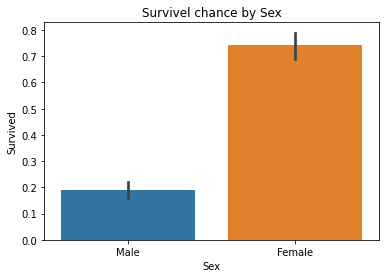

In [ ]:
sns.barplot(data = titanic_df_cp, x= 'Sex', y='Survived').set(title= 'Survivel chance by Sex', xticklabels=['Male', "Female"])

### Fare
The next graph represnt the survivel rate by fare of the ticket.

[Text(0.5, 1.0, 'Fare')]

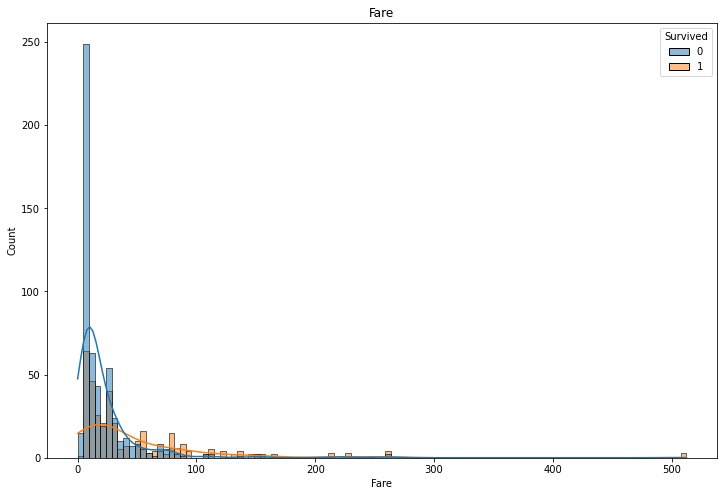

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(x="Fare", hue="Survived", data=titanic_df,kde=True).set(title= "Fare")

### Family
Let's see what we can learn from family size.

In [ ]:
titanic_df_cp['Family_Size'] = titanic_df_cp['SibSp'] + titanic_df_cp['Parch'] + 1
display(titanic_df_cp)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Family_Size
0,0,3,0,22.00,1,0,7.2500,0,1,2
1,1,1,1,38.00,1,0,71.2833,1,0,2
2,1,3,1,26.00,0,0,7.9250,0,1,1
3,1,1,1,35.00,1,0,53.1000,0,1,2
4,0,3,0,35.00,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.00,0,0,13.0000,0,1,1
887,1,1,1,19.00,0,0,30.0000,0,1,1
888,0,3,1,21.75,1,2,23.4500,0,1,4
889,1,1,0,26.00,0,0,30.0000,1,0,1


[Text(0.5, 1.0, 'Family Size Survivel')]

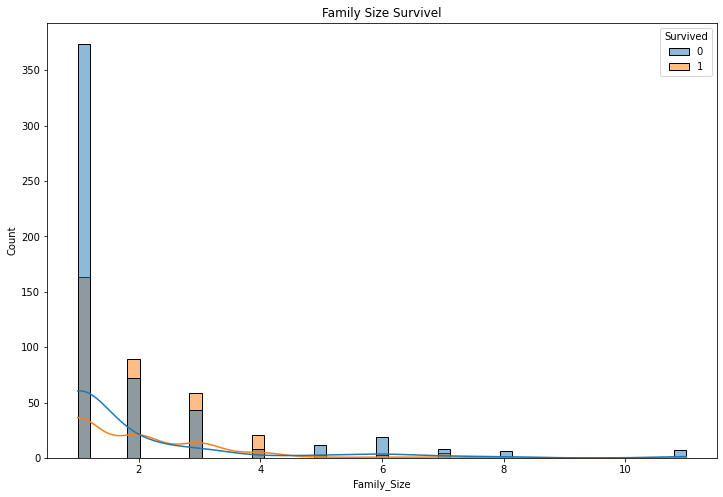

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(x="Family_Size", hue="Survived", data=titanic_df_cp,kde=True).set(title= "Family Size Survivel")

#### Conclusion from data invistegation
We can learn that most of the survivels were from first class and were female.  
Which is not a surprising result due to the "Women and children first" code.  
From Fare we can learn that who paid less for the ticket had less chances of survivel, which were mostlty third class passengers.  
Also we can see from the Family Size feature that we creted that smaller familes has bigger chance to survive while bigger familes has very low rates of survivel.  

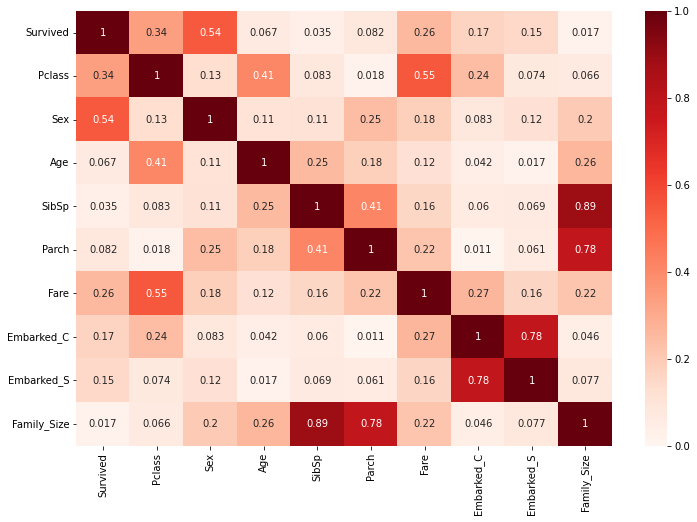

In [ ]:
plt.figure(figsize=(12,8))
cor = np.abs(titanic_df_cp.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

### Train and Test data
We now would like to start prepraring the data for training the testing.  
Before doing so, for now we can also drop the name coloumn.  
To start expriment the data, we need to split the original data into temporary train and validation.  
We split the original data into 80% train and 20% test.

In [ ]:
t = titanic_df_cp['Survived']
display(t)
X = titanic_df_cp.drop(['Survived'], axis=1)
display(X)
X_train, X_test, t_train, t_test = sklearn.model_selection.train_test_split(X, t, test_size=0.2, random_state=2)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Family_Size
0,3,0,22.00,1,0,7.2500,0,1,2
1,1,1,38.00,1,0,71.2833,1,0,2
2,3,1,26.00,0,0,7.9250,0,1,1
3,1,1,35.00,1,0,53.1000,0,1,2
4,3,0,35.00,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.00,0,0,13.0000,0,1,1
887,1,1,19.00,0,0,30.0000,0,1,1
888,3,1,21.75,1,2,23.4500,0,1,4
889,1,0,26.00,0,0,30.0000,1,0,1


### Classification
We use **Logitic Regression** to classify the data, I chose to use the *SDGclassifer* for this assigment.   
Logistic Regression is a model used to predict to propabilty of certain class or event, like in this assigment- to predict if a person survived or not.   
SDGclassifer is an estimator that implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). (source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  
In other words we use Gradient Decscent is an optimization algorithm used to fit linear classifiers under loss functions.  
The Logistic Regression graph looks like a 'S' cureved shape with the values between (0 , 1) which represnt the probabilty of an event (0.5 > True, 0.5 < False).  
In our case if we'll get a probaiblty higher than 0.5, the model will classify it as 'Survived'(=1) otherwise as 'Not Survived'(=0).  
![Logistic Regression](https://user-images.githubusercontent.com/41818563/98540004-e73df180-2295-11eb-904f-f4940c2026b4.png)



In [ ]:
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)
y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)

The score in SDGClassifier is the mean accuracy.  
The accuracy is defined as the ratio between the number of correct predictions and all the predictions.  
The higher the result, the better the model.


In [ ]:
# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))

Accuracy score on train 0.8230337078651685
Accuracy score on test 0.7932960893854749


### Train the original data
After we trained and tested the validation data, we need to test on the original training data before we test the submission.

In [ ]:
t_original = titanic_df_cp['Survived']
display(t_original)
X_original = titanic_df_cp.drop(['Survived'], axis=1)
display(X_original)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Family_Size
0,3,0,22.00,1,0,7.2500,0,1,2
1,1,1,38.00,1,0,71.2833,1,0,2
2,3,1,26.00,0,0,7.9250,0,1,1
3,1,1,35.00,1,0,53.1000,0,1,2
4,3,0,35.00,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.00,0,0,13.0000,0,1,1
887,1,1,19.00,0,0,30.0000,0,1,1
888,3,1,21.75,1,2,23.4500,0,1,4
889,1,0,26.00,0,0,30.0000,1,0,1


In [ ]:
SGD_cls_original = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_original, t_original)
y_train_prob = SGD_cls_original.predict_proba(X_original)
y_train = SGD_cls_original.predict(X_original)

In [ ]:
print('Accuracy score on train', SGD_cls.score(X_original, t_original))

Accuracy score on train 0.8170594837261503


In [ ]:
count_empty_values_in_each_column(titanic_test_df)
titanic_test_df.replace('male', 0, inplace=True)
titanic_test_df.replace('female', 1, inplace=True)
titanic_test_df['Age'] = titanic_test_df['Age'].fillna(titanic_test_df.groupby(['Sex', 'Pclass'])['Age'].transform('mean'))
titanic_test_df.Fare.fillna(titanic_test_df.Fare.mode()[0], inplace = True)
titanic_test_df = pd.get_dummies(titanic_test_df, columns=["Embarked"])
titanic_test_df['Family_Size'] = titanic_test_df['SibSp'] + titanic_test_df['Parch'] + 1
titanic_test_df = titanic_test_df.drop(['PassengerId','Name','Ticket','Cabin','Embarked_Q'], axis=1)
display(titanic_test_df)

empty values
------------

PassengerId: 0
Pclass: 0
Name: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Ticket: 0
Fare: 1
Cabin: 327
Embarked: 0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Family_Size
0,3,0,34.500000,0,0,7.8292,0,0,1
1,3,1,47.000000,1,0,7.0000,0,1,2
2,2,0,62.000000,0,0,9.6875,0,0,1
3,3,0,27.000000,0,0,8.6625,0,1,1
4,3,1,22.000000,1,1,12.2875,0,1,3
...,...,...,...,...,...,...,...,...,...
413,3,0,24.525104,0,0,8.0500,0,1,1
414,1,1,39.000000,0,0,108.9000,1,0,1
415,3,0,38.500000,0,0,7.2500,0,1,1
416,3,0,24.525104,0,0,8.0500,0,1,1


### Final Prediction

In [ ]:
display(titanic_test_df)
test_prediction = SGD_cls_original.predict(titanic_test_df)
submission_df['Survived'] = test_prediction.astype(int)
submission_df.to_csv('submission.csv', index = False)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Family_Size
0,3,0,34.500000,0,0,7.8292,0,0,1
1,3,1,47.000000,1,0,7.0000,0,1,2
2,2,0,62.000000,0,0,9.6875,0,0,1
3,3,0,27.000000,0,0,8.6625,0,1,1
4,3,1,22.000000,1,1,12.2875,0,1,3
...,...,...,...,...,...,...,...,...,...
413,3,0,24.525104,0,0,8.0500,0,1,1
414,1,1,39.000000,0,0,108.9000,1,0,1
415,3,0,38.500000,0,0,7.2500,0,1,1
416,3,0,24.525104,0,0,8.0500,0,1,1


### Conclusion EX1
For the first time trying to use Machine Learning models I've learned a lot even though I had few straggles while doing this asissigment, it was quite not easy at first, but it was a very interesting assigemnt.  
I'm sure the next ones will be much better.

# Exercise 3

## Cross Validation

For spliting our data into train and valiation we can  
For spliting our data into train and valiation we can use CV (Cross-Validation) instead of breaking the data to train-validation splits.  
When we use CV, we have better predictions of the test results.  
It is similar to splitting the data, but we make sure that our split won't affect our result (we try a few possible splits).  
We can use 2 CV methods:  
1. KFold  
2.LPO (Leave P out)  
We will use KFold when we want speed.

In [ ]:
# function to get cv score

def get_cv_score_and_loss(X, t, model, k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
        
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), accuracy_score(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), accuracy_score(t_val, y_val)]


    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss

## Model Training  

For model training I chose 2 models:  
1. KNN (k-nearest neighbors)  
2. LDA (Linear Discriminant Analysis)  


### KNN  

k-nearest neighbors algorithm (KNN) is a non-parametric classification method.  
The input consists of the k closest training examples in a data set.  
The output in classification problems is the given object that simply assigned to the class of the nearest neighbor.

In [ ]:
knn_mon = KNeighborsClassifier()
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, knn_mon, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

mean cv val score: 0.73
mean cv val loss 0.73
mean cv train score: 0.81
mean cv train loss 0.81


#### KNN Hyper Paramters  

For hyper paramter search, we use leaf_size, n_neighbors.  
n_neighbors = Number of neighbors to use by default for kneighbors queries.  
leaf_size = Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.


In [ ]:
hyper_params = {'leaf_size': list(range(1,50,2)),
'n_neighbors': list(range(1,30))}

knn_cv= GridSearchCV(KNeighborsClassifier(), hyper_params, cv=5).fit(X, t)
print('Accuracy score for regression:')
print('rs_model', knn_cv.best_score_)
print('best params', knn_cv.best_params_)

Accuracy score for regression:
rs_model 0.7273805787458414
best params {'leaf_size': 1, 'n_neighbors': 22}


In [ ]:
knn_tuned = KNeighborsClassifier(leaf_size=7, n_neighbors=21, p =1)
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, knn_tuned, k=5, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

mean cv val score: 0.74
mean cv val loss 0.74
mean cv train score: 0.77
mean cv train loss 0.77


We can see that we get lower scores but the data is more fitted and and loss score is better than the original model.

### LDA

LinearDiscriminantAnalysis can be used to perform supervised dimensionality reduction, by projecting the input data to a linear subspace consisting of the directions which maximize the separation between classes (in a precise sense discussed in the mathematics section below). The dimension of the output is necessarily less than the number of classes, so this is in general a rather strong dimensionality reduction, and only makes sense in a multiclass setting.

In [ ]:
# show score of lda on the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, lda_model, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

mean cv val score: 0.80
mean cv val loss 0.80
mean cv train score: 0.80
mean cv train loss 0.80


### Feature Selection

In [ ]:
selector = RFECV(lda_model, cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X, t)
top_features_df = X.loc[:, selector.support_]
num_features = len(selector.support_)
print('_______', num_features, ' most segnificant features are:_______')
display(top_features_df.columns)

_______ 9  most segnificant features are:_______


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_S', 'Family_Size'],
      dtype='object')

In [ ]:
best_features = top_features_df.columns.tolist()
print(best_features)

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_S', 'Family_Size']


In [ ]:
X_best = X[best_features]
X_best

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Family_Size
0,3,0,22.00,1,0,7.2500,0,1,2
1,1,1,38.00,1,0,71.2833,1,0,2
2,3,1,26.00,0,0,7.9250,0,1,1
3,1,1,35.00,1,0,53.1000,0,1,2
4,3,0,35.00,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.00,0,0,13.0000,0,1,1
887,1,1,19.00,0,0,30.0000,0,1,1
888,3,1,21.75,1,2,23.4500,0,1,4
889,1,0,26.00,0,0,30.0000,1,0,1


## Ensmble Models  

Now we'll check the preformance of ensmble models.   
Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model.  
1. AdaBoost  
2. Gradient Boosting

#### AdaBoost  

AdaBoost, short for Adaptive Boosting,it can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier.  AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier()
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_best, t, adaboost_model, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

mean cv val score: 0.82
mean cv val loss 0.82
mean cv train score: 0.84
mean cv train loss 0.84


##### AdaBoost Hyper Paramters  

n_estimators: The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.  

Learning rate:  Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters.

In [ ]:
param_dist = {'n_estimators': [50, 100, 200, 300, 400,500,550,600,650,700,800,900],
              'learning_rate': [0.0001, 0.001 ,0.01,0.1, 1]
             }
adaboost_cv = GridSearchCV(AdaBoostClassifier(), param_dist, cv=5).fit(X_best, t)

print('Accuracy score for regression:')
print('ab_model', adaboost_cv.best_score_)
print('best params', adaboost_cv.best_params_)

Accuracy score for regression:
ab_model 0.8204695248258111
best params {'learning_rate': 1, 'n_estimators': 200}


In [ ]:
adaboost_tuned = AdaBoostClassifier(learning_rate=1, n_estimators=200)

With adaboost we get much better preforamnce and more fitted model than the previous regular models.

#### Gradient Boosting  

Gradient boosting is a machine learning technique used in regression and classification tasks, among others.  It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.  When a decision tree is the weak learner.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_model = GradientBoostingClassifier()
val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X_best, t, gradient_model, k=10, show_score_loss_graphs=True)
print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
print(f'mean cv train score: {train_score:.2f}\nmean cv train loss {train_loss:.2f}')

mean cv val score: 0.82
mean cv val loss 0.82
mean cv train score: 0.90
mean cv train loss 0.90


##### Gradient Boosting Hyper Paramters

In [ ]:
param_dist = {
    "n_estimators":[5,50,250,500],
    "max_depth":list(range(1,9)),
    "learning_rate":[0.01,0.1,1]
}

gbm_gs = GridSearchCV(GradientBoostingClassifier(), param_dist, cv=5).fit(X_best, t)

print('Accuracy score for regression:')
print('ab_model', gbm_gs.best_score_)
print('best params', gbm_gs.best_params_)

Accuracy score for regression:
ab_model 0.8361559224154165
best params {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}


In [ ]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=250)

With Gradient Boosting we get also better model the regular models.

## Model Comperation  

For choosing the best model we can compare the scores of the models.

In [ ]:
X_train, X_val, t_train, t_val = model_selection.train_test_split(X_best, t, test_size=0.3, random_state=1)

In [ ]:
# show the accuracy by model
hp_models = {'LDA': lda_model, 'KNN': knn_mon, 'KNN_tuned': knn_tuned, 'AdaBoost': adaboost_model, 'AdaBoost_tuned': adaboost_tuned, 'GBM': gradient_model, 'GBM_tuned': gbm_tuned}

def show_accuracy_by_model(X_train, t_train, X_val, t_val, models):
    accuracy_df = pd.DataFrame(columns=['model_name', 'split', 'accuracy'])

    for model_name, model in models.items():
        model.fit(X_train, t_train)
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'train', model.score(X_train, t_train)]
        accuracy_df.loc[len(accuracy_df)] = [model_name, 'val', model.score(X_val, t_val)]

    fig = px.bar(accuracy_df, x='model_name', y='accuracy', color='split', barmode='group')
    # img_bytes = fig.to_image(format="png", width=600, height=350, scale=2)
    display(fig)
    # display(Image(img_bytes))

show_accuracy_by_model(X_train, t_train, X_val, t_val, hp_models)



### Confusion Matrix  
We want to be able to explain the results of a classifier.
When talking about binary classification, the classification type of a sample can be one out of four:

1. TP (True Positive) - The model classified correctly that a sample is positive.
2. TN (True Negative) - The model classified correctly that a sample is negative.
3. FP (False Positive) - The model classified a sample as positive but the sample is actually negative.
4. FN (False Negative) - The model classified a sample as negative but the sample is actually positive.

#### Precision

The percentage of correct positive predictions out of all the positive predictions.

#### Recall

The percentage of correct positive predictions out of all the actual positive samples.

#### Specificity

The percentage of correct negative predictions out of all the actual negative samples.

#### FPR

The percentage of mistaken negative predictions out of all the actual negative samples.

#### Accuracy

The percentage of correct predictions out of all the data.


In [ ]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

In [ ]:
def show_cf(t_train, y_train, t_val, y_val):
  cm_train = confusion_matrix(t_train, y_train)
  cm_val = confusion_matrix(t_val, y_val)
  cm_train_df = pd.DataFrame(cm_train, index=['actual_e', 'actual_p'], columns=['predicted_e', 'predicted_p'])
  cm_val_df = pd.DataFrame(cm_val, index=['actual_e', 'actual_p'], columns=['predicted_e', 'predicted_p'])

  sns.set(font_scale=2)
  plt.figure(figsize = (15,12))
  fig = sns.heatmap(cm_train_df, annot=True, cmap=plt.cm.Pastel1, fmt='g')
  fig.set_title("cm_train")
  plt.show()
  print()
  plt.figure(figsize = (15,12))
  fig = sns.heatmap(cm_val_df, annot=True, cmap=plt.cm.Pastel2, fmt='g')
  fig.set_title("cm_val")
  plt.show()
  
  print(f'Train: precision {precision(cm_train):.2f}, recall {recall(cm_train):.2f}, specificity {specificity(cm_train):.2f}, fpr {fpr(cm_train):.2f}, accuracy {accuracy(cm_train):.2f}')
  print(f'Val:   precision {precision(cm_val):.2f}, recall {recall(cm_val):.2f}, specificity {specificity(cm_val):.2f}, fpr {fpr(cm_val):.2f}, accuracy {accuracy(cm_val):.2f}')

=====model:LDA======


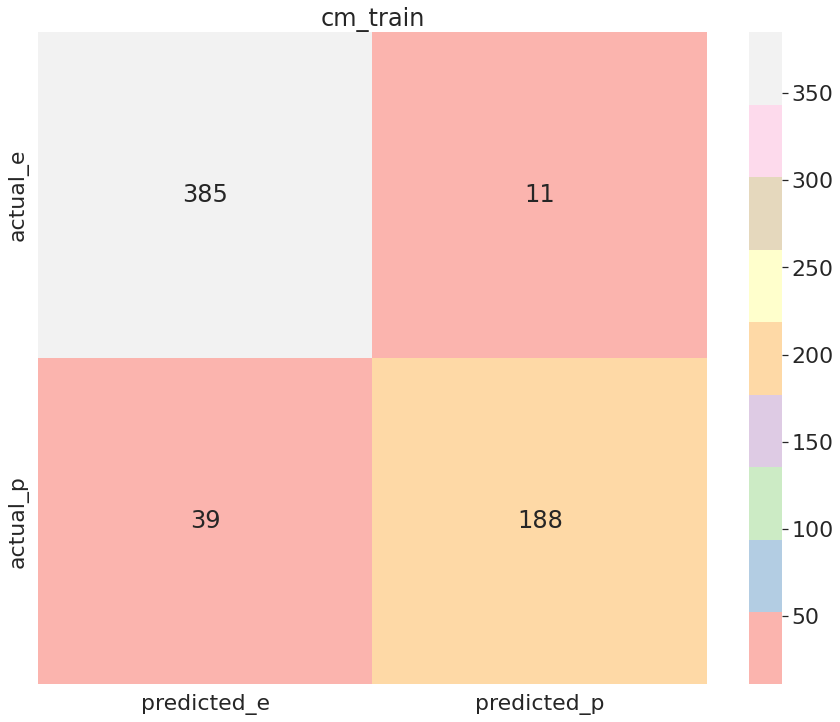

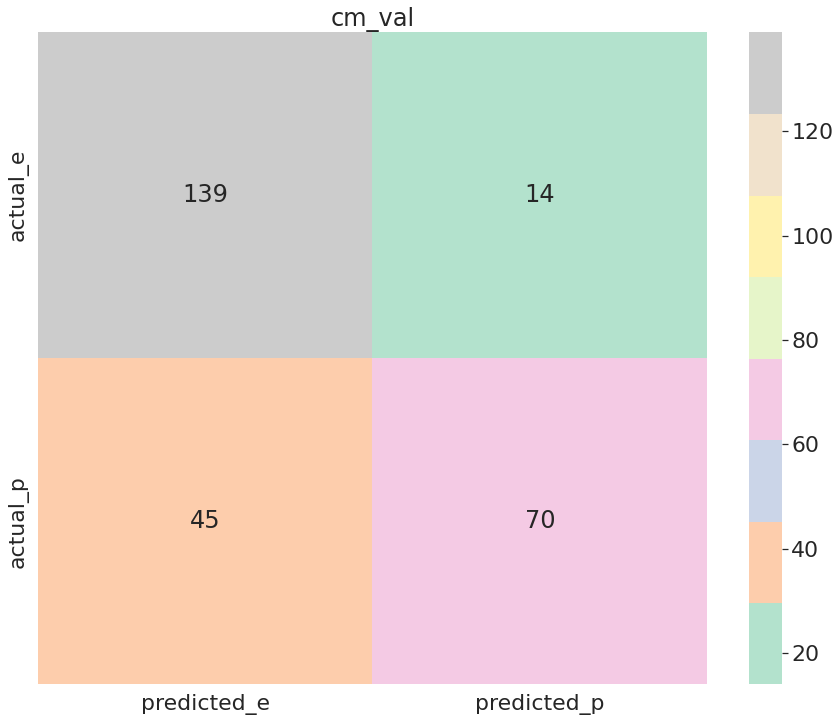

Train: precision 0.94, recall 0.83, specificity 0.97, fpr 0.03, accuracy 0.92
Val:   precision 0.83, recall 0.61, specificity 0.91, fpr 0.09, accuracy 0.78
=====model:KNN======


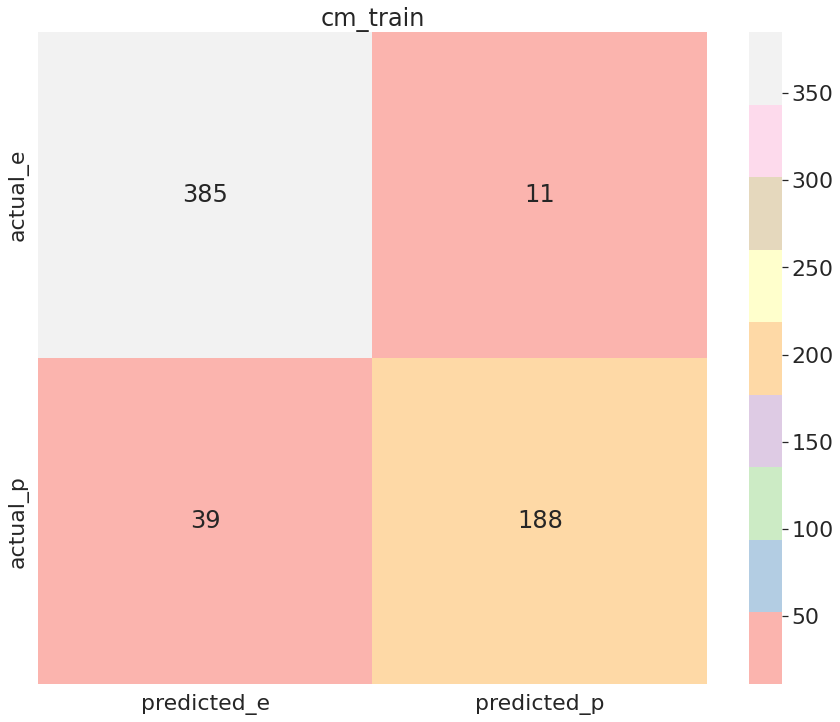

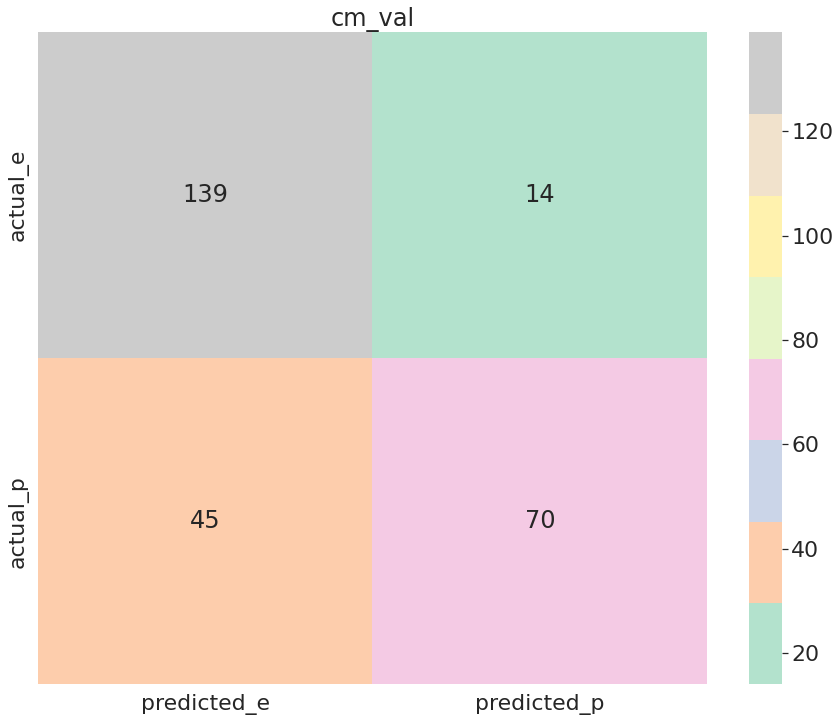

Train: precision 0.94, recall 0.83, specificity 0.97, fpr 0.03, accuracy 0.92
Val:   precision 0.83, recall 0.61, specificity 0.91, fpr 0.09, accuracy 0.78
=====model:KNN_tuned======


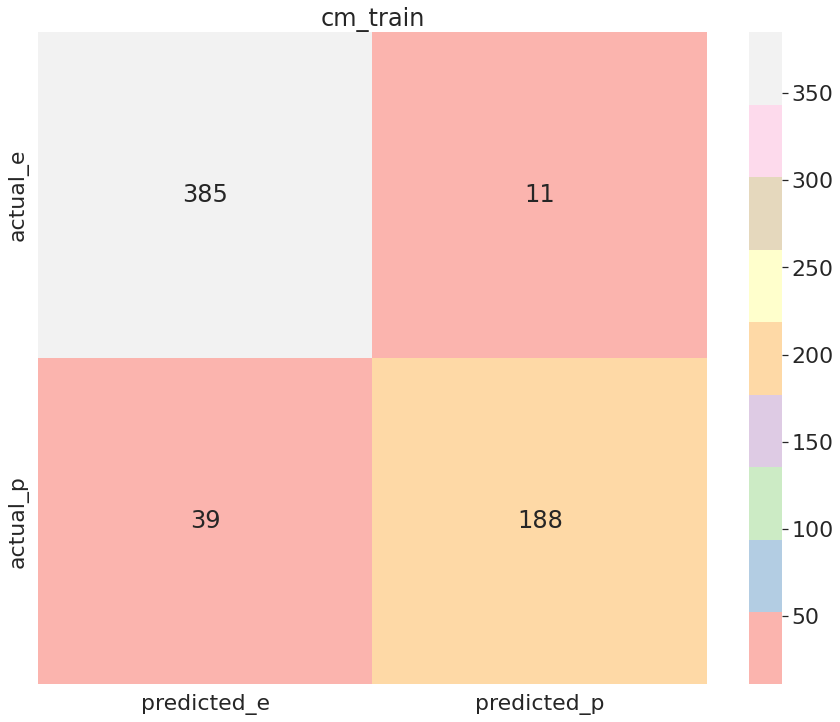

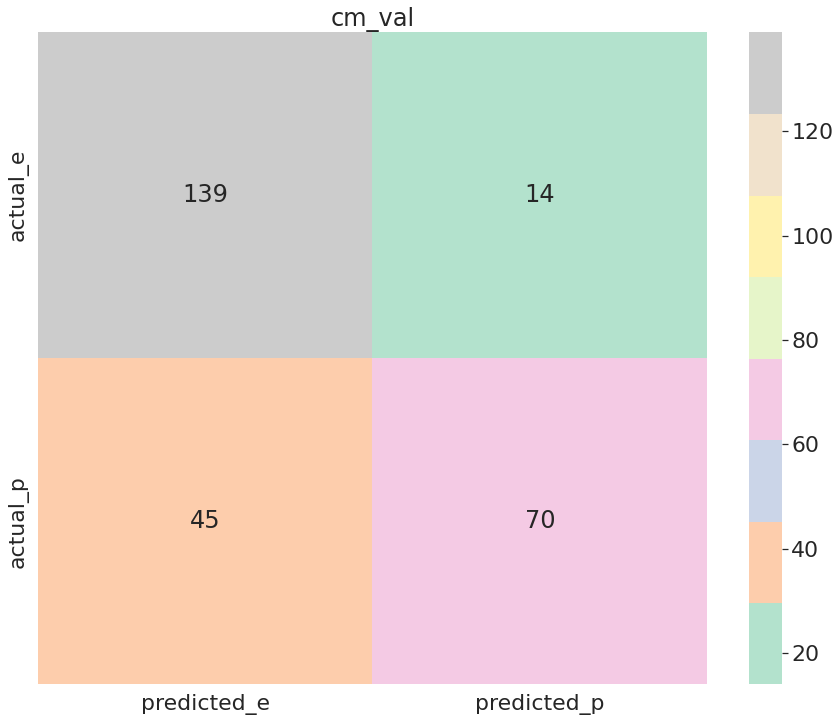

Train: precision 0.94, recall 0.83, specificity 0.97, fpr 0.03, accuracy 0.92
Val:   precision 0.83, recall 0.61, specificity 0.91, fpr 0.09, accuracy 0.78
=====model:AdaBoost======


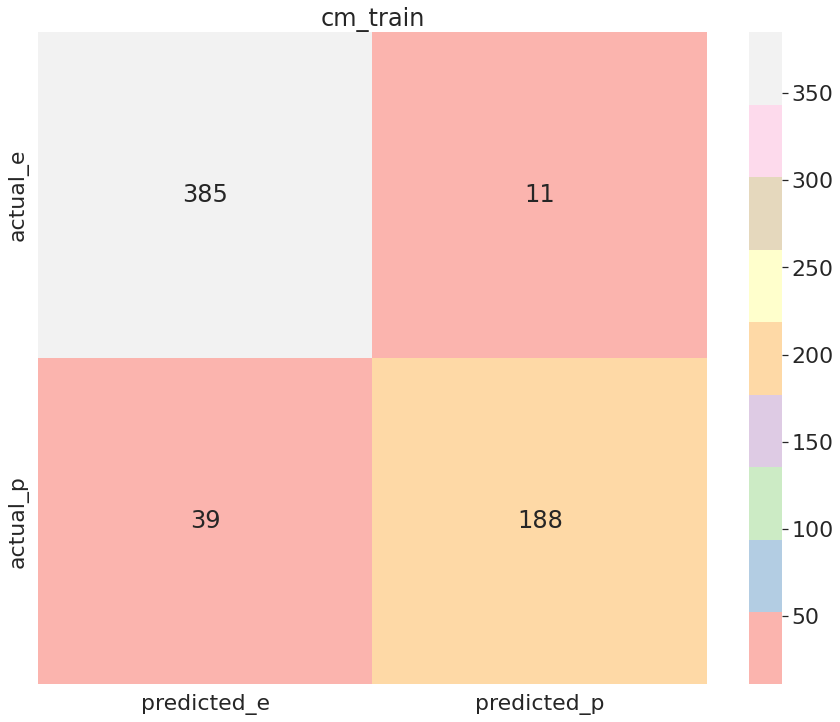

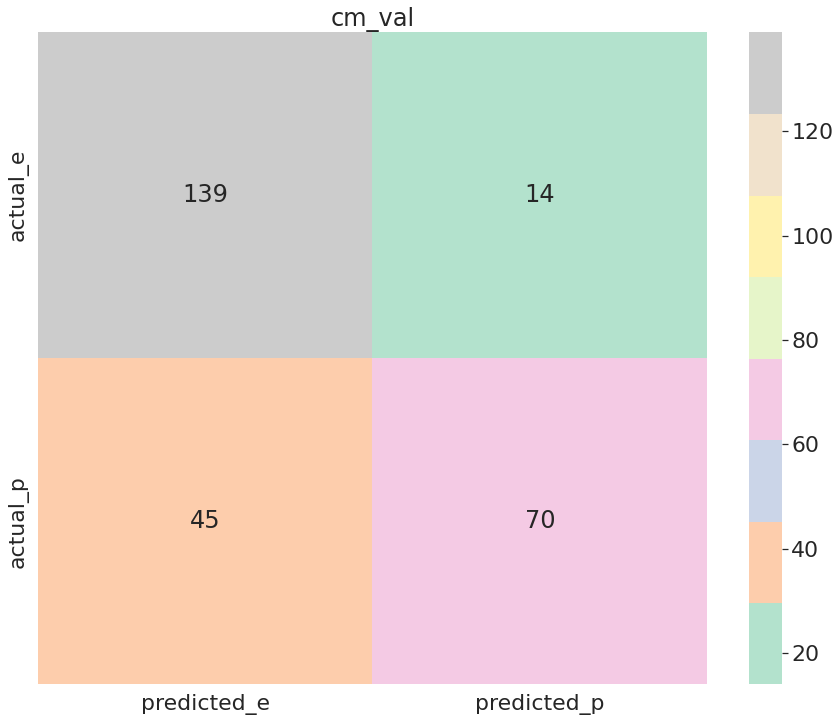

Train: precision 0.94, recall 0.83, specificity 0.97, fpr 0.03, accuracy 0.92
Val:   precision 0.83, recall 0.61, specificity 0.91, fpr 0.09, accuracy 0.78
=====model:AdaBoost_tuned======


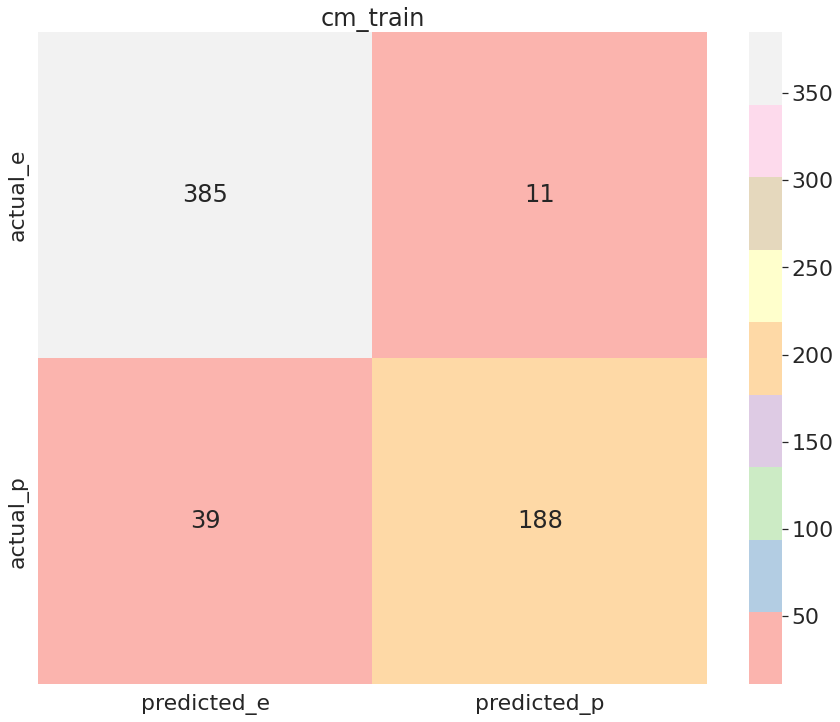

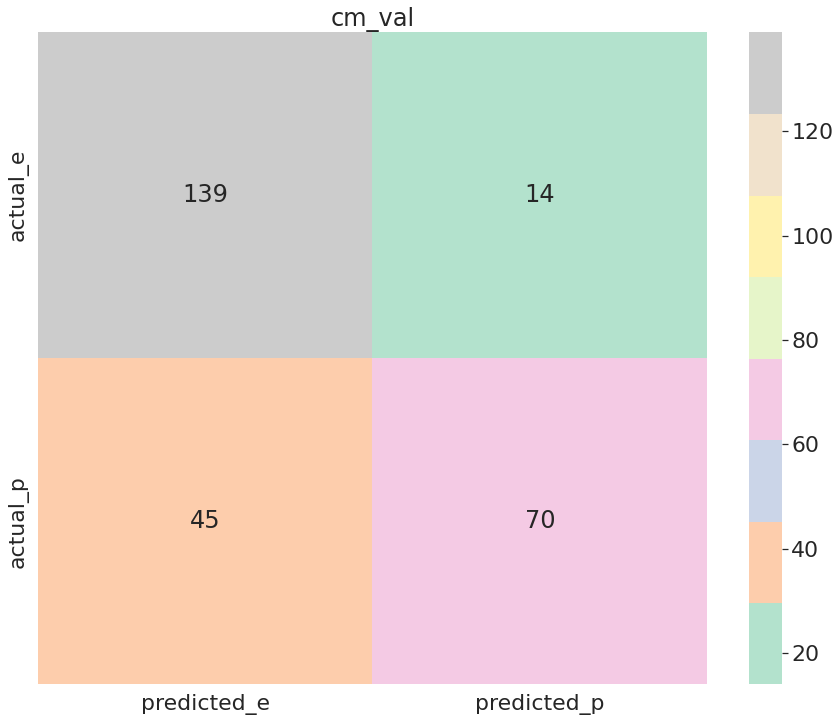

Train: precision 0.94, recall 0.83, specificity 0.97, fpr 0.03, accuracy 0.92
Val:   precision 0.83, recall 0.61, specificity 0.91, fpr 0.09, accuracy 0.78
=====model:GBM======


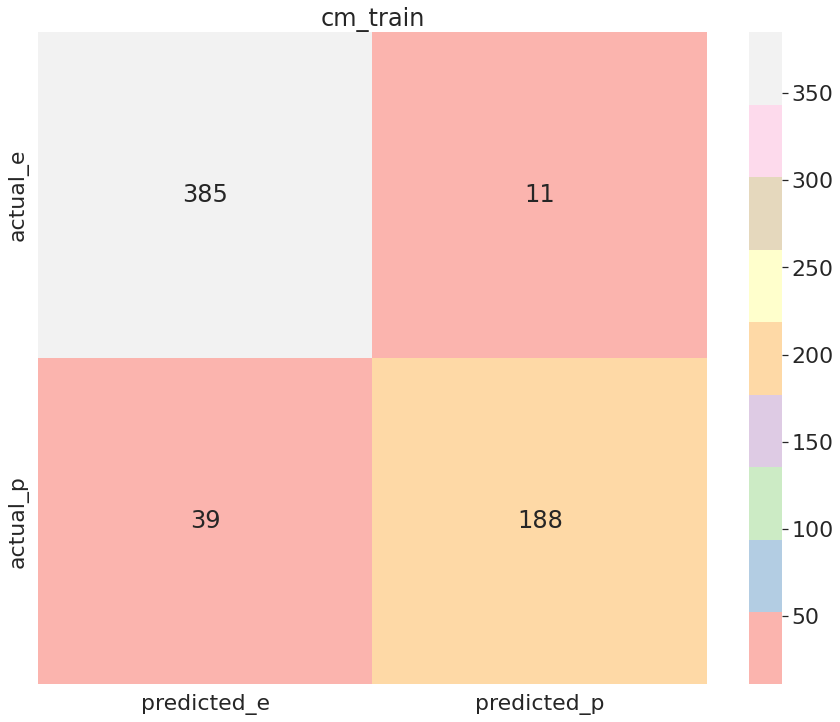

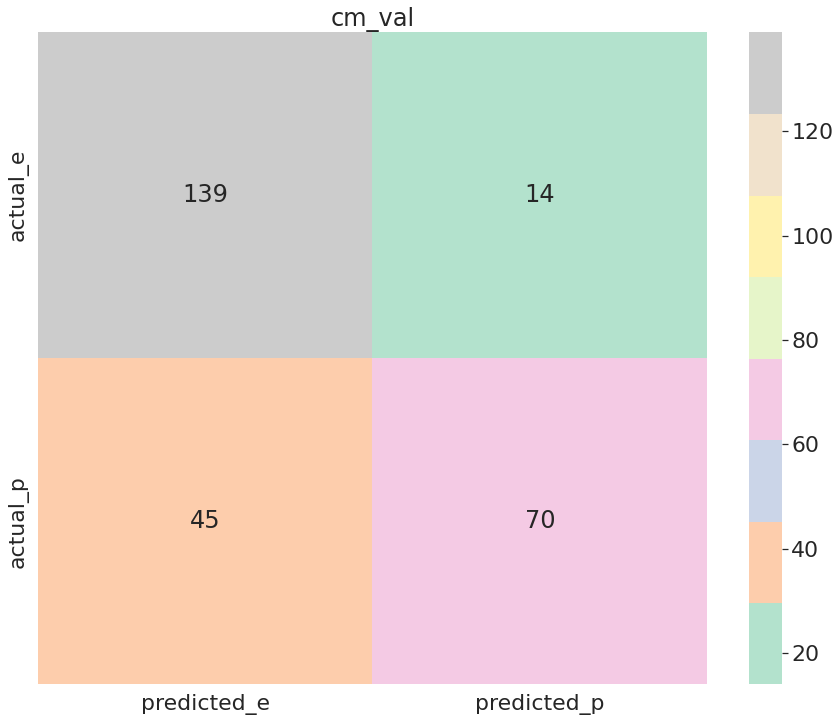

Train: precision 0.94, recall 0.83, specificity 0.97, fpr 0.03, accuracy 0.92
Val:   precision 0.83, recall 0.61, specificity 0.91, fpr 0.09, accuracy 0.78
=====model:GBM_tuned======


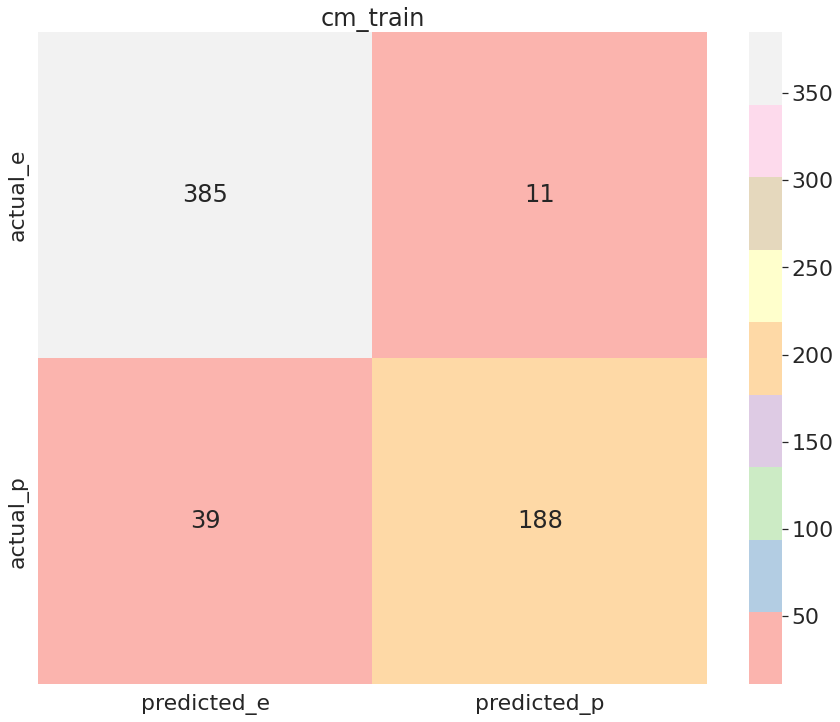

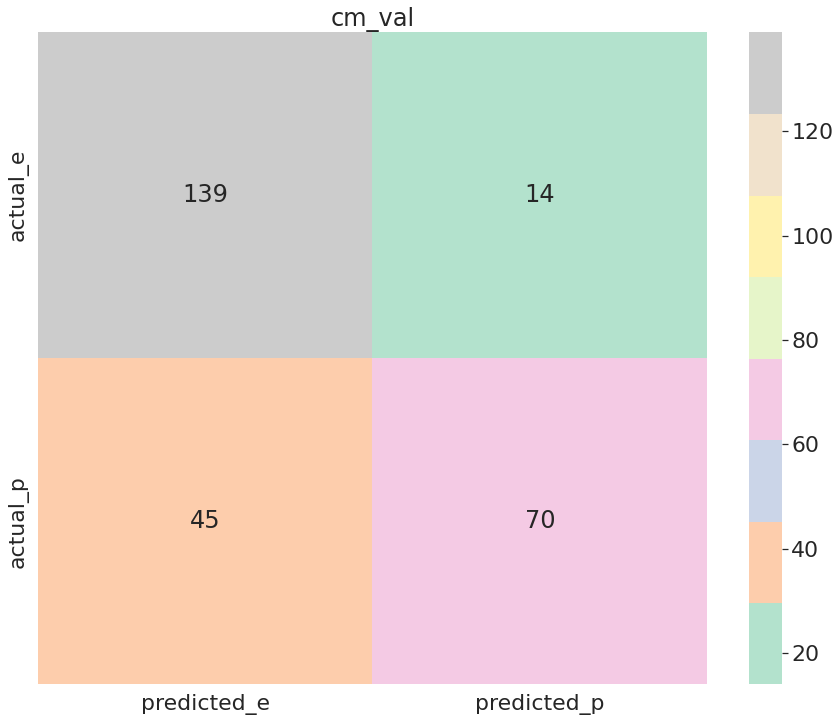

Train: precision 0.94, recall 0.83, specificity 0.97, fpr 0.03, accuracy 0.92
Val:   precision 0.83, recall 0.61, specificity 0.91, fpr 0.09, accuracy 0.78


In [ ]:
for model in hp_models:
  y_train = gradient_model.predict(X_train)
  y_val = gradient_model.predict(X_val)
  print(f'=====model:{model}======')
  show_cf(t_train, y_train, t_val, y_val)

# gradient_model = gbm_tuned.fit(X_train, t_train)
# y_train = gradient_model.predict(X_train)
# y_val = gradient_model.predict(X_val)
# show_cf(t_train, y_train, t_val, y_val)

### Conclusion

From the scores and the Confusion Matrix scores we can see that the most fitted and best model is Adaboost.  

#### Train original data

Before submiting the test let's train the original data on the best model we found.

In [ ]:
adaboost_model = adaboost_model.fit(X, t)

y_predict = adaboost_model.predict(X)


print("Accuracy for adaboost tuned: ", adaboost_model.score(X, t))

Accuracy for adaboost tuned:  0.8305274971941639


## Final Prediction

In [ ]:
test_prediction = adaboost_model.predict(titanic_test_df)
submission_df['Survived'] = test_prediction.astype(int)
submission_df.to_csv('submission.csv', index = False)

## Exercise Conclusion
In this assigment I've learned a lot about models comparing and more about complicated models, ensmbled models.  
I got better understaing of hyper paramters tuning and how it can affect the perforamnce of the selected model.